# ATMS 523
## Module 4 Notebook 1
## Wrangling time series

### Combining datasets with pandas

Here we will load a variety of climate datasets, and use pandas to unify the datasets for further analysis.

In [1]:
import pandas as pd

# Using python engine although slower b/c it can handle footers
enso = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/censo.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=2, engine='python')
pdo = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/pdo.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=14, engine='python')
nao = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/nao.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=3, engine='python')
ao = pd.read_csv('https://www.esrl.noaa.gov/psd/data/correlation/ao.data',delim_whitespace=True,header=None,skiprows=1,skipfooter=3, engine='python')

Take a look at the dataframes, note how they are formatted and if there are any issues with the values (missing data, etc.).

In [2]:
enso


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1948,0.26,0.43,0.72,0.21,0.24,0.41,0.08,0.25,0.45,-0.64,-0.21,0.58
1,1949,0.18,0.13,-0.55,0.15,0.43,0.00,-0.06,0.08,-0.42,-0.59,-0.29,-0.91
2,1950,-0.74,-1.70,-1.43,-1.29,-1.22,-1.69,-1.69,-0.96,-0.95,-1.27,-1.12,-1.61
3,1951,-1.13,-0.69,-0.24,0.33,0.71,0.19,1.33,1.01,1.10,1.15,0.91,0.83
4,1952,0.64,0.56,0.07,0.71,-0.50,-0.74,-0.54,-0.12,-0.03,-0.06,-0.02,0.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,2018,-1.12,-0.13,-1.45,-0.49,-0.26,0.31,0.20,0.45,1.07,0.24,0.62,-0.23
71,2019,0.36,1.58,0.92,0.72,1.15,0.83,0.80,0.22,0.99,0.66,1.07,0.73
72,2020,0.20,0.30,0.52,0.48,-0.42,-0.02,-0.44,-1.28,-1.24,-1.19,-1.19,-1.86
73,2021,-1.87,-1.84,-0.55,-0.42,-0.45,-0.25,-1.05,-0.73,-0.70,-1.04,-1.14,-1.60


Now that we have read in the data, it's time to get them into a format that we can use with pandas.  Time series should be a single column, with a date column with a value of each index in each row.

We'll approach this by creating a new data frame and reformatting the 12 x nyears array to a 1 x nobservations array corresponding with each date.

Let's start with ENSO.

In [3]:
enso_new=pd.DataFrame()


In [4]:
enso_new

""


Let's create an ENSO 'Date' column that has a Datetime Index.  The pandas DatetimeIndex can be used to generate dates with a given frequency.

In [5]:
# This date is hardcoded, but could go back and do this automatically just reading the first and last rows 
enso_new['Date']=pd.date_range(start=pd.datetime(1948,1,1),end=pd.datetime(2022,12,1),freq="MS")

enso_new = enso_new.set_index('Date')

/tmp/ipykernel_181042/2816597988.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  enso_new['Date']=pd.date_range(start=pd.datetime(1948,1,1),end=pd.datetime(2022,12,1),freq="MS")


In [ ]:
enso_new

Now, let's stuff the data into our array.  We can use the stack() command to take the 2D array and create a 1D column.

In [7]:
# Seecting all the rows, one column over (don't want to grab date col)
# Stack rotates column by 90deg
len(enso.loc[:,1:].stack().values)

900

In [8]:
enso_new['ENSO']=enso.loc[:,1:].stack().values

How does it look?

In [9]:
enso_new

,ENSO
Date,
1948-01-01,0.26
1948-02-01,0.43
1948-03-01,0.72
1948-04-01,0.21
1948-05-01,0.24
...,...
2022-08-01,-1.52
2022-09-01,-9.99
2022-10-01,-9.99


<AxesSubplot:xlabel='Date'>

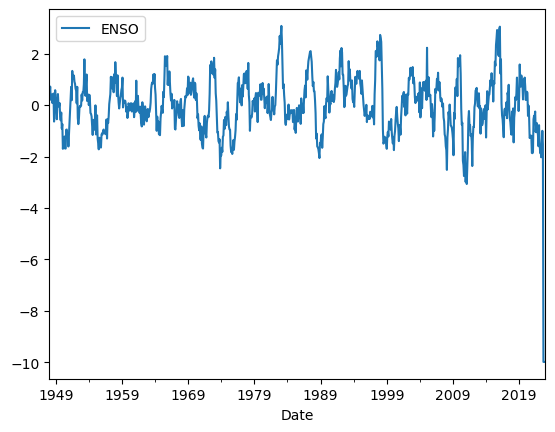

In [10]:
enso_new.plot()

## In-class exercise, do this for all of the 4 climate indicies.

Be sure to check the date ranges of your indicies by carefully inspecting the dataframes!

In [11]:
nao_new=pd.DataFrame()
pdo_new=pd.DataFrame()
ao_new=pd.DataFrame()

nao_new['Date'] = pd.date_range(start=pd.datetime(1948,1,1),end=pd.datetime(2022,12,1),freq="MS")
pdo_new['Date'] = pd.date_range(start=pd.datetime(1948,1,1),end=pd.datetime(2022,12,1),freq="MS")
ao_new['Date'] = pd.date_range(start=pd.datetime(1950,1,1),end=pd.datetime(2022,12,1),freq="MS")

nao_new = nao_new.set_index('Date')
pdo_new = pdo_new.set_index('Date')
ao_new = ao_new.set_index('Date')

nao_new['NAO']=nao.loc[:,1:].stack().values
pdo_new['PDO']=pdo.loc[:,1:].stack().values
ao_new['AO']=ao.loc[:,1:].stack().values

/tmp/ipykernel_181042/452868773.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  nao_new['Date'] = pd.date_range(start=pd.datetime(1948,1,1),end=pd.datetime(2022,12,1),freq="MS")
/tmp/ipykernel_181042/452868773.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  pdo_new['Date'] = pd.date_range(start=pd.datetime(1948,1,1),end=pd.datetime(2022,12,1),freq="MS")
/tmp/ipykernel_181042/452868773.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ao_new['Date'] = pd.date_range(start=pd.datetime(1950,1,1),end=pd.datetime(2022,12,1),freq="MS")


In [12]:
pdo_new

,PDO
Date,
1948-01-01,-0.11
1948-02-01,-0.74
1948-03-01,-0.03
1948-04-01,-1.33
1948-05-01,-0.23
...,...
2022-08-01,-9.90
2022-09-01,-9.90
2022-10-01,-9.90


(586.0, 600.0)

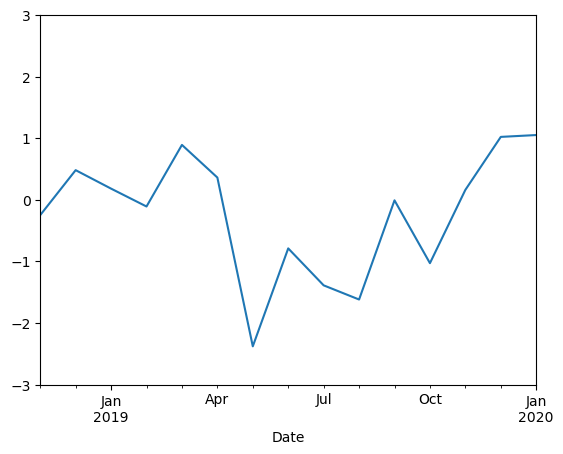

In [15]:
#%pylab inline
# NAO tells you pressure differences across some lats in N Altlantic - basically 
# how stormy conditions are across Atlantic
nao_new['NAO'].plot()
plt.ylim([-3,3])
plt.xlim(['11-01-2018','01-01-2020'])

# Merging dataframes

Now that we have these indicies, we can join them together into one dataset.  We can use the pd.merge() command to do this for each of our dataframes one by one.  We need to tell pandas how to do the merge, and we do that by specifying the left_index and right_index, where left and right are the data frames given first and second in the pd.merge command.

In [16]:
newdf_all = pd.merge(enso_new,pdo_new, left_index=True, right_index=True)

In [17]:
newdf_all

,ENSO,PDO
Date,,
1948-01-01,0.26,-0.11
1948-02-01,0.43,-0.74
1948-03-01,0.72,-0.03
1948-04-01,0.21,-1.33
1948-05-01,0.24,-0.23
...,...,...
2022-08-01,-1.52,-9.90
2022-09-01,-9.99,-9.90
2022-10-01,-9.99,-9.90


<AxesSubplot:xlabel='Date'>

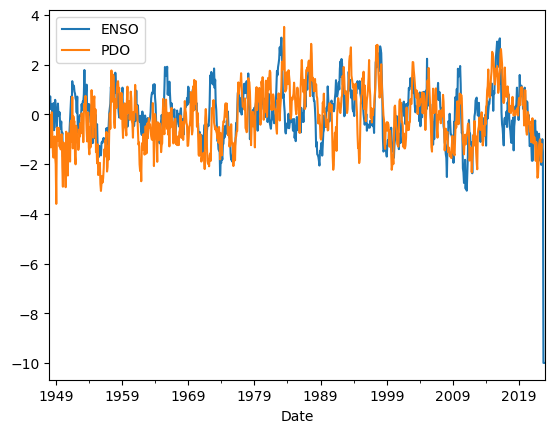

In [18]:
import numpy as np
# Getting rid of -999 filler value
newdf_all['PDO'][newdf_all['PDO'] <= -9.9] = np.nan
newdf_all.plot()

Rinse and repeat until all 4 columns are included in your new dataframe.

<AxesSubplot:xlabel='Date'>

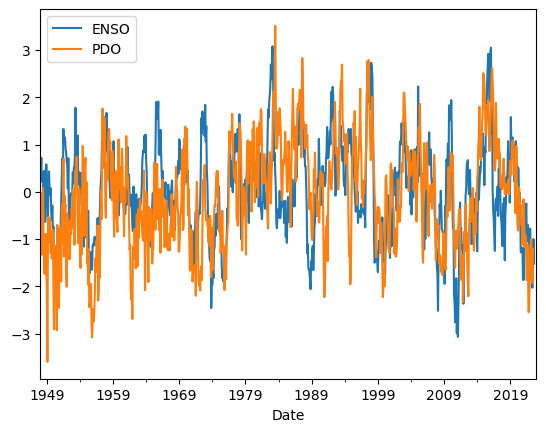

In [19]:
newdf_all['ENSO'][newdf_all['ENSO'] <= -9.9] = np.nan
newdf_all.plot()

In [20]:
newdf_all = pd.merge(newdf_all,nao_new, left_index=True, right_index=True)
newdf_all['NAO'][newdf_all['NAO'] <= -99.9] = np.nan

<AxesSubplot:xlabel='Date'>

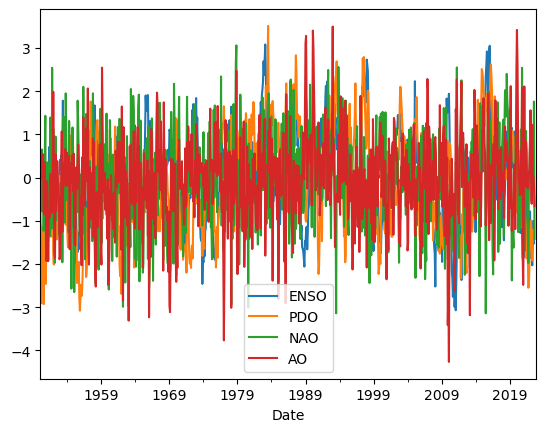

In [21]:
newdf_all = pd.merge(newdf_all,ao_new, left_index=True, right_index=True)
newdf_all['AO'][newdf_all['AO'] <= -99.9] = np.nan

newdf_all.plot()

In [22]:
newdf_all

,ENSO,PDO,NAO,AO
Date,,,,
1950-01-01,-0.74,-2.13,0.56,-0.060
1950-02-01,-1.70,-2.91,0.01,0.627
1950-03-01,-1.43,-1.13,-0.78,-0.008
1950-04-01,-1.29,-1.20,0.65,0.555
1950-05-01,-1.22,-2.23,-0.50,0.072
...,...,...,...,...
2022-08-01,-1.52,NaN,1.76,-0.180
2022-09-01,NaN,NaN,-1.42,-0.661
2022-10-01,NaN,NaN,NaN,NaN


Let's plot them against each other


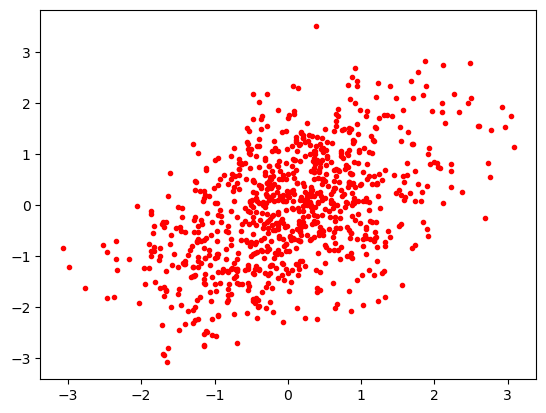

In [23]:
# Can see some correlation between these 2 datasets
plt.plot(newdf_all['ENSO'].values,newdf_all['PDO'].values,'.r')

Or do it all together in one swoop.

/data/keeling/a/leanneb2/miniconda3/envs/ml_intro/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


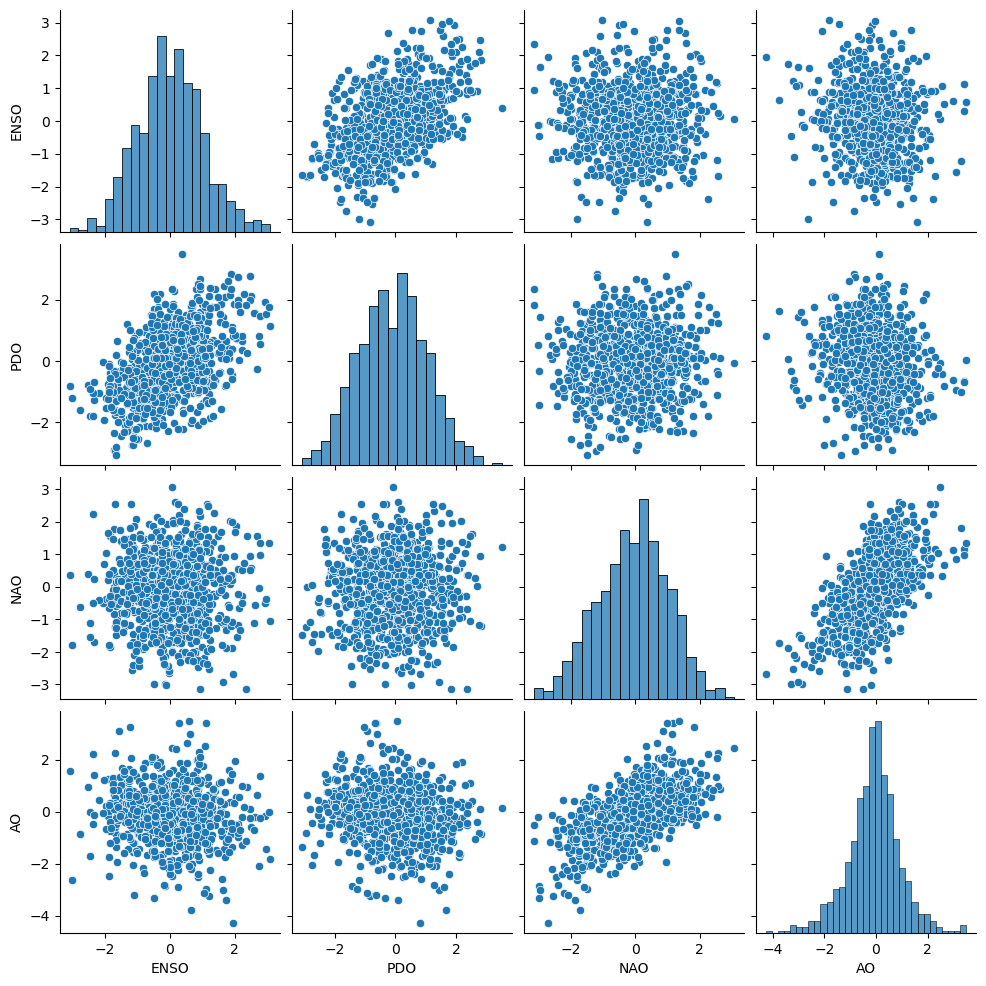

In [25]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
# Compares columns against each other very easily - allows you to see what migh be correlated
# See these histograms are mostly normal or gaussian distributed
sns.pairplot(newdf_all)


Now let's bring in another dataset, the NASA GISS observed temperature record.  How does it match up with the climate indicies above?

In [26]:
!wget https://data.giss.nasa.gov/pub/gistemp/gistemp250_GHCNv4.nc.gz

--2022-10-08 16:48:10--  https://data.giss.nasa.gov/pub/gistemp/gistemp250_GHCNv4.nc.gz
Resolving data.giss.nasa.gov (data.giss.nasa.gov)... 129.164.128.233, 2001:4d0:2310:230::233
Connecting to data.giss.nasa.gov (data.giss.nasa.gov)|129.164.128.233|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11097480 (11M) [application/x-gzip]
Saving to: 'gistemp250_GHCNv4.nc.gz'

100%[======================================>] 11,097,480  4.70MB/s   in 2.3s   

2022-10-08 16:48:13 (4.70 MB/s) - 'gistemp250_GHCNv4.nc.gz' saved [11097480/11097480]



In [27]:
%matplotlib inline
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs

In [28]:
data = xr.open_dataset('gistemp250_GHCNv4.nc.gz')
data
   

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1712, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2022-08-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2022-09-12 12:19:17 by SBBX_to_nc 2.0 - ILAND=250, ...

Text(0.5, 1.0, 'GISTEMPv4 temperature trend (deg/year)')

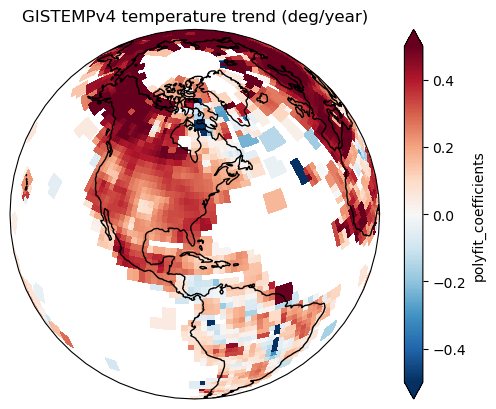

In [29]:
ax = plt.axes(projection=ccrs.Orthographic(-80, 35))
# Plotting a trend - ployfit on time dimension to tell us what the trend in temp is over
# this time period
# Can see extreme warming over Arctic
data['tempanomaly'].polyfit(dim='time',deg=1).isel(degree=1)['polyfit_coefficients'].plot(ax=ax, transform=ccrs.PlateCarree(), vmin=-0.5, vmax=0.5, cmap='RdBu_r')
ax.set_global(); ax.coastlines(); ax.set_title('GISTEMPv4 temperature trend (deg/year)')

Here we will introduce the sel command to find time and space subsets of our dataset.  Let's pull out the observed temperature trends at the point closest to Champaign-Urbana and examine the relationships with climate indicies.

In [30]:
temp = pd.DataFrame()

temp.index = data.time-pd.Timedelta(14, unit="D")
temp['obsT']=data['tempanomaly'].sel(lat=40.,lon=-88., method='nearest')

newdf_all = pd.merge(newdf_all,temp,left_index=True, right_index=True)


/data/keeling/a/leanneb2/miniconda3/envs/ml_intro/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/data/keeling/a/leanneb2/miniconda3/envs/ml_intro/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


In [31]:
temp

,obsT
1880-01-01,9.30
1880-02-01,4.20
1880-03-01,0.42
1880-04-01,0.41
1880-05-01,3.56
...,...
2022-04-01,-1.29
2022-05-01,2.02
2022-06-01,1.13
2022-07-01,0.44


In [32]:
newdf_all

,ENSO,PDO,NAO,AO,obsT
1950-01-01,-0.74,-2.13,0.56,-0.060,5.11
1950-02-01,-1.70,-2.91,0.01,0.627,0.32
1950-03-01,-1.43,-1.13,-0.78,-0.008,-1.89
1950-04-01,-1.29,-1.20,0.65,0.555,-3.68
1950-05-01,-1.22,-2.23,-0.50,0.072,0.52
...,...,...,...,...,...
2022-04-01,-1.81,-1.51,-0.54,-0.606,-1.29
2022-05-01,-2.03,-1.92,0.71,1.218,2.02
2022-06-01,-1.50,-1.21,0.19,-0.084,1.13
2022-07-01,-1.00,NaN,-0.06,0.018,0.44


Let's plot!

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_181042/922028515.py:43: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


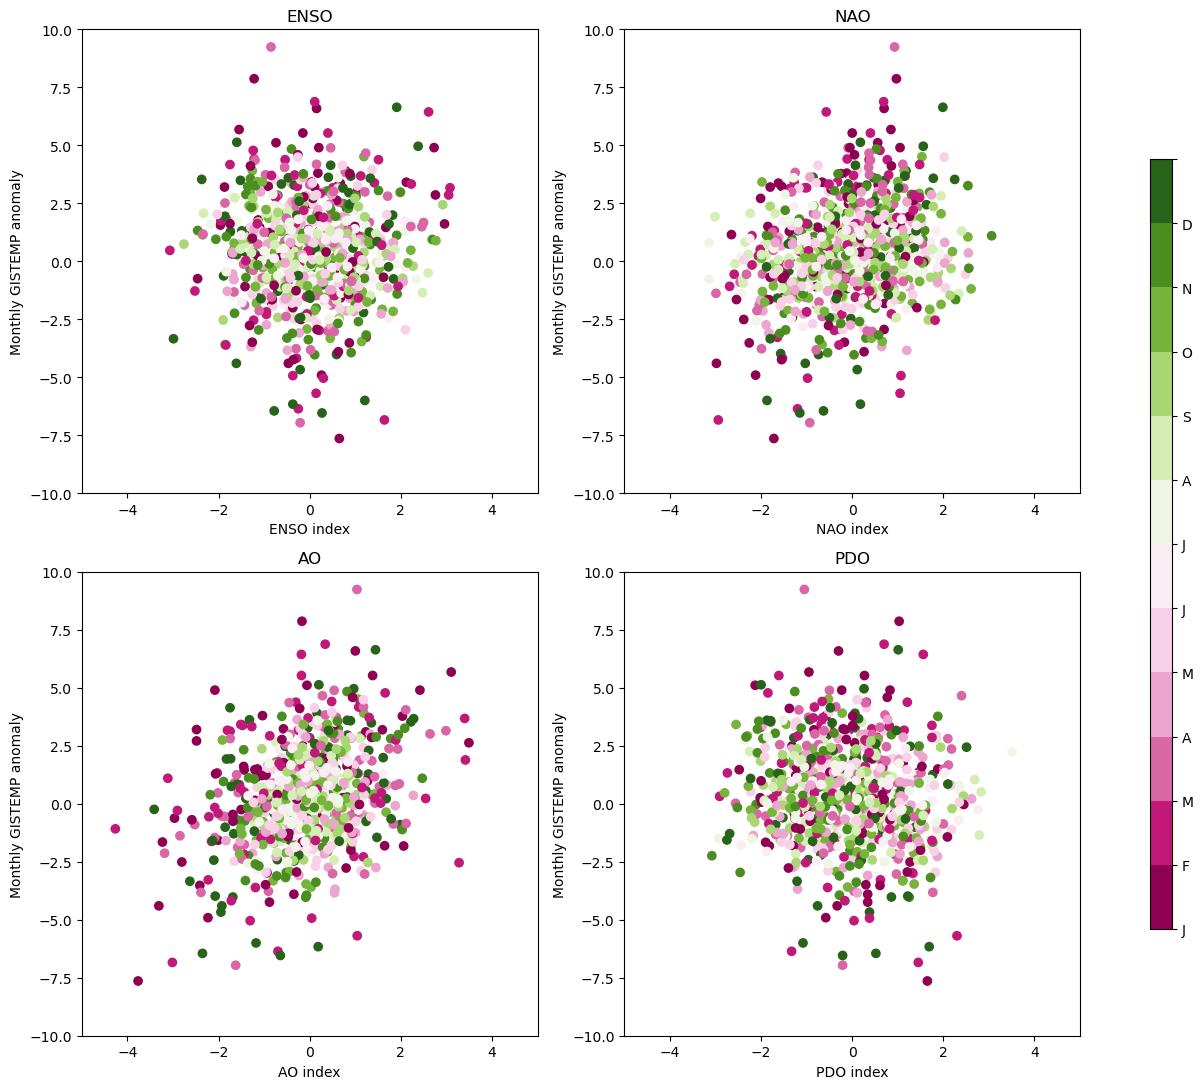

In [33]:
%pylab inline
import matplotlib as mpl

# Plotting temp on yaxis and ENSO or other climate variables on xaxis

cmap = cm.get_cmap('PiYG', 12)    # 11 discrete colors
norm = mpl.colors.Normalize(vmin=1, vmax=13)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(11,11))

ax1.scatter(newdf_all['ENSO'].values,newdf_all['obsT'].values,c=newdf_all.index.month,cmap=cmap,norm=norm)
ax1.set_title('ENSO')
ax1.set_xlabel('ENSO index')
ax1.set_ylabel('Monthly GISTEMP anomaly')
ax1.set_ylim([-10,10])
ax1.set_xlim([-5,5])

ax2.scatter(newdf_all['NAO'].values,newdf_all['obsT'].values,c=newdf_all.index.month,cmap=cmap,norm=norm)
ax2.set_title('NAO')
ax2.set_xlabel('NAO index')
ax2.set_ylabel('Monthly GISTEMP anomaly')
ax2.set_ylim([-10,10])
ax2.set_xlim([-5,5])

ax3.scatter(newdf_all['AO'].values,newdf_all['obsT'].values,c=newdf_all.index.month,cmap=cmap,norm=norm)
ax3.set_title('AO')
ax3.set_xlabel('AO index')
ax3.set_ylabel('Monthly GISTEMP anomaly')
ax3.set_ylim([-10,10])
ax3.set_xlim([-5,5])


im=ax4.scatter(newdf_all['PDO'].values,newdf_all['obsT'].values,c=newdf_all.index.month,cmap=cmap,norm=norm)
ax4.set_title('PDO')
ax4.set_xlabel('PDO index')
ax4.set_ylabel('Monthly GISTEMP anomaly')
ax4.set_ylim([-10,10])
ax4.set_xlim([-5,5])

#fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([1.05, 0.15, 0.02, 0.7])
cbar=fig.colorbar(im, cax=cbar_ax, ticks=1+np.arange(13), norm=norm)
cbar.ax.set_yticklabels(['J','F','M','A','M','J','J','A','S','O','N','D',' '])  # vertically oriented colorbar

plt.tight_layout()